## Extract each sheet and remove inconsistencies

In [149]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

In [150]:
xl = pd.ExcelFile('Datasets/download.xlsx') #parse Excel file
sheet_names = xl.sheet_names #assign sheet names to a list
k = len(sheet_names)
sheets_consistent=[]

In [151]:
for x in range(k):
    sheet_x = xl.parse(sheet_names[x]) #parse sheet with name x, where i is defined in sheet_names
    if sheet_x.iat[8,1] != "Base redressée" and sheet_x.iat[9,1] == "Base redressée":
        sheet_x = sheet_x.drop([8]) #drop row 8
        i = sheet_x.shape[0] #number of rows in sheet_x
        sheet_x.index = range(i) #reassign index
        sheets_consistent.append(sheet_x) #append sheet_x to sheet_names_2
    else:
        sheets_consistent.append(sheet_x) #if 'base redressee' in [8,1], leave as is and append

In [152]:
for x in range(k):
    if sheets_consistent[x].iat[8,1] != "Base redressée":
        print(x) #check to see if all sheets have 'base redressee' in cell [8,1]. (sheets 0 and 1 are exceptions)

0
1


# Extract questions from sheet[1] to a list

In [218]:
summary_page = sheets_consistent[1].set_index('SOMMAIRE').dropna()#set index column to be SOMMAIRE column and drop nan values
y = len(summary_page) #define number of non-empty values in summary_page

In [219]:
questions=[] #empty list
for x in range(y):
    questions.append(summary_page.iat[x,0]) #append questions to a list

# Data into structured dictionary

In [340]:
values_=[] #create an empty list
for t in range(2,y+2): #append question, year, answer and figure to the list for each occurence
    p = sheets_consistent[t]['Baromètre d’opinion de la Drees'].count() #count the number of values in answers column
    g = sheets_consistent[t].iloc[6].count() #count the number of values in years row
    for i in range(g): #for each year
        for j in range(p-1): #for each answer
            values_.append(("{0}".format(questions[t-2].split(".")[0]),"{0}".format(sheets_consistent[t].iat[6,2+(2*i)]),"{0}".format(sheets_consistent[t].iat[8+j,1].replace('  ','')),"{0}".format(sheets_consistent[t].iat[8+j,2+(2*i)])))
            

In [374]:
#export to CSV
with open('barometer_dataset.csv', 'w') as f:
    writer = csv.writer(f)
    for k in values_:#_.items():
        writer.writerow(k)

## Plot examples graphs

In [363]:
year_val_og1_basered = [x[1] for x in values_ if x[0]=='OG1' and x[2]=='Base redressée'] #list of years for 'base redressee' answers
figure_val_og1_basered = [x[3] for x in values_ if x[0]=='OG1' and x[2]=='Base redressée'] #list of figures for 'base redressee' answers

year_val_og1_stbonne = [x[1] for x in values_ if x[0]=='OG1' and x[2]=='S/T Bonne'] #list of years for 's/t bonne' answers
figure_val_og1_stbonne = [x[3] for x in values_ if x[0]=='OG1' and x[2]=='S/T Bonne'] #list of figures for 's/t bonne' answers

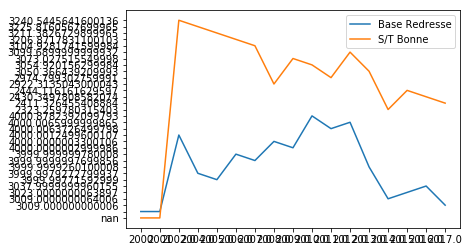

In [371]:
plt.plot(year_val_og1_basered,figure_val_og1_basered,label='Base Redresse')
plt.plot(year_val_og1_stbonne,figure_val_og1_stbonne,label='S/T Bonne')
plt.legend()
plt.show()